In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Clean Data_1.csv')

In [93]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [94]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [96]:
from sklearn.ensemble import ExtraTreesClassifier

In [97]:
from sklearn.feature_selection import SelectFromModel

In [99]:
X.shape

(856, 24)

In [100]:
clf = ExtraTreesClassifier(n_estimators=50)

In [101]:
clf = clf.fit(X, y)

In [102]:
clf.feature_importances_

array([0.05108938, 0.05733258, 0.05237305, 0.06887332, 0.04411919,
       0.00657872, 0.01311584, 0.01205263, 0.01586604, 0.05158761,
       0.01239303, 0.01548671, 0.00793369, 0.00914611, 0.00709803,
       0.0068774 , 0.01113966, 0.01000451, 0.00862285, 0.00663446,
       0.0098412 , 0.14420455, 0.32515541, 0.05247403])

In [103]:
model = SelectFromModel(clf, prefit=True)

In [104]:
X_new = model.transform(X)

In [105]:
X_new.shape 

(856, 9)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Biopsy',axis=1)
y = df['Biopsy']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)

# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
model = DecisionTreeClassifier()

In [109]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
predictions = model.predict(X_test)

In [111]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9575971731448764


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       263
           1       0.68      0.75      0.71        20

    accuracy                           0.96       283
   macro avg       0.83      0.86      0.85       283
weighted avg       0.96      0.96      0.96       283



[[256   7]
 [  5  15]]


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [26]:
model = LogisticRegression(max_iter=10000)

In [28]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [29]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9575971731448764


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       263
           1       0.72      0.65      0.68        20

    accuracy                           0.96       283
   macro avg       0.85      0.82      0.83       283
weighted avg       0.96      0.96      0.96       283



[[258   5]
 [  7  13]]


In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [55]:
model = Sequential()

# input layer
model.add(Dense(units=24,activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# compiler
model.compile(loss='binary_crossentropy', optimizer='adam') 

In [56]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [57]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
18/18 [==============================] - 1s 10ms/step - loss: 57.0194 - val_loss: 3.7667
Epoch 2/600
18/18 [==============================] - 0s 2ms/step - loss: 37.0937 - val_loss: 2.7356
Epoch 3/600
18/18 [==============================] - 0s 2ms/step - loss: 32.2292 - val_loss: 4.6403
Epoch 4/600
18/18 [==============================] - 0s 3ms/step - loss: 25.1789 - val_loss: 5.8493
Epoch 5/600
18/18 [==============================] - 0s 2ms/step - loss: 20.0295 - val_loss: 6.5206
Epoch 6/600
18/18 [==============================] - 0s 3ms/step - loss: 17.3469 - val_loss: 6.9708
Epoch 7/600
18/18 [==============================] - 0s 3ms/step - loss: 14.0077 - val_loss: 6.9326
Epoch 8/600
18/18 [==============================] - 0s 3ms/step - loss: 11.6256 - val_loss: 7.3331
Epoch 9/600
18/18 [==============================] - 0s 2ms/step - loss: 11.1645 - val_loss: 7.2841
Epoch 10/600
18/18 [==============================] - 0s 3ms/step - loss: 12.4391 - val_loss: 7.099

Epoch 83/600
18/18 [==============================] - 0s 3ms/step - loss: 0.3678 - val_loss: 0.3106
Epoch 84/600
18/18 [==============================] - 0s 2ms/step - loss: 0.3731 - val_loss: 0.3097
Epoch 85/600
18/18 [==============================] - 0s 2ms/step - loss: 0.4492 - val_loss: 0.3020
Epoch 86/600
18/18 [==============================] - 0s 3ms/step - loss: 0.3266 - val_loss: 0.2880
Epoch 87/600
18/18 [==============================] - 0s 3ms/step - loss: 0.3510 - val_loss: 0.2849
Epoch 88/600
18/18 [==============================] - 0s 3ms/step - loss: 0.3049 - val_loss: 0.2951
Epoch 89/600
18/18 [==============================] - 0s 3ms/step - loss: 0.4489 - val_loss: 0.2874
Epoch 90/600
18/18 [==============================] - 0s 3ms/step - loss: 0.3905 - val_loss: 0.2931
Epoch 91/600
18/18 [==============================] - 0s 3ms/step - loss: 0.3850 - val_loss: 0.2879
Epoch 92/600
18/18 [==============================] - 0s 3ms/step - loss: 0.3783 - val_loss: 0.2959


18/18 [==============================] - 0s 3ms/step - loss: 0.2419 - val_loss: 0.2621
Epoch 165/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2559 - val_loss: 0.2619
Epoch 166/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2522 - val_loss: 0.2616
Epoch 167/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2693 - val_loss: 0.2657
Epoch 168/600
18/18 [==============================] - 0s 2ms/step - loss: 0.2532 - val_loss: 0.2626
Epoch 169/600
18/18 [==============================] - 0s 2ms/step - loss: 0.2575 - val_loss: 0.2647
Epoch 170/600
18/18 [==============================] - 0s 2ms/step - loss: 0.2525 - val_loss: 0.2637
Epoch 171/600
18/18 [==============================] - 0s 2ms/step - loss: 0.2557 - val_loss: 0.2628
Epoch 172/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2443 - val_loss: 0.2637
Epoch 173/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2421 - val_loss: 0.2615
Epoc

<AxesSubplot:>

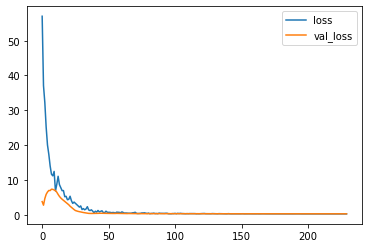

In [58]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [59]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9293286219081273


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       263
           1       0.00      0.00      0.00        20

    accuracy                           0.93       283
   macro avg       0.46      0.50      0.48       283
weighted avg       0.86      0.93      0.90       283



[[263   0]
 [ 20   0]]


C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=8, scoring='accuracy')
print(scores)

[0.95833333 0.94444444 0.98611111 0.94444444 0.95833333 0.91549296
 0.92957746 0.91549296]


In [89]:
scores.mean()

0.9440287558685445

In [90]:
predictions = model.predict(X_test)

In [91]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9575971731448764


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       263
           1       0.68      0.75      0.71        20

    accuracy                           0.96       283
   macro avg       0.83      0.86      0.85       283
weighted avg       0.96      0.96      0.96       283



[[256   7]
 [  5  15]]
